In [1]:
# %%
# Celda 1: Importación de Librerías
# ==================================
# Importamos las librerías necesarias para nuestro análisis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [3]:
# %%
# Celda 2: Carga de Datos
# ========================
# Cargamos el set de datos desde el archivo CSV.
# Asegúrate de haber descargado el archivo y tenerlo en una carpeta "data".
try:
    df = pd.read_csv(r'C:\Users\30110308\Desktop\analisis-retail-python\data\online_retail_II.csv')
    print("Set de datos cargado correctamente.")
    print("Dimensiones del DataFrame:", df.shape)
except FileNotFoundError:
    print("Error: Asegúrate de que el archivo 'online_retail_II.csv' esté en una carpeta llamada 'data'.")

Set de datos cargado correctamente.
Dimensiones del DataFrame: (1067371, 8)


In [4]:
# %%
# Celda 3: Exploración Inicial
# ============================
# Echamos un primer vistazo a los datos para entender su estructura.
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

print("\nInformación general del DataFrame:")
df.info()


Primeras 5 filas del DataFrame:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count

In [5]:
# %%
# Celda 4: Limpieza de Datos
# ==========================
# El éxito de un análisis depende de la calidad de los datos.

# 4.1. Manejar valores nulos
# Las filas sin Customer ID no son útiles para análisis de clientes.
df.dropna(subset=['Customer ID'], inplace=True)
print(f"\nFilas después de eliminar nulos en 'Customer ID': {df.shape[0]}")

# 4.2. Convertir tipos de datos
# Convertimos 'Customer ID' a entero para un manejo más limpio.
df['Customer ID'] = df['Customer ID'].astype(int)
# Convertimos 'InvoiceDate' a formato datetime para poder analizar fechas.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("\nTipos de datos convertidos correctamente.")

# 4.3. Filtrar transacciones de devolución
# Las facturas que empiezan con 'C' son devoluciones y tienen cantidad negativa.
df = df[~df['Invoice'].str.startswith('C', na=False)]
df = df[df['Quantity'] > 0]
print(f"Filas después de eliminar devoluciones: {df.shape[0]}")


Filas después de eliminar nulos en 'Customer ID': 824364

Tipos de datos convertidos correctamente.
Filas después de eliminar devoluciones: 805620


In [6]:
# %%
# Celda 5: Ingeniería de Características (Feature Engineering)
# =========================================================
# Creamos nuevas columnas a partir de las existentes para facilitar el análisis.

# 5.1. Calcular el precio total por transacción
df['TotalPrice'] = df['Quantity'] * df['Price']

# 5.2. Extraer información de la fecha
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
print("\nNuevas columnas creadas: TotalPrice, Year, Month, DayOfWeek, Hour.")


Nuevas columnas creadas: TotalPrice, Year, Month, DayOfWeek, Hour.


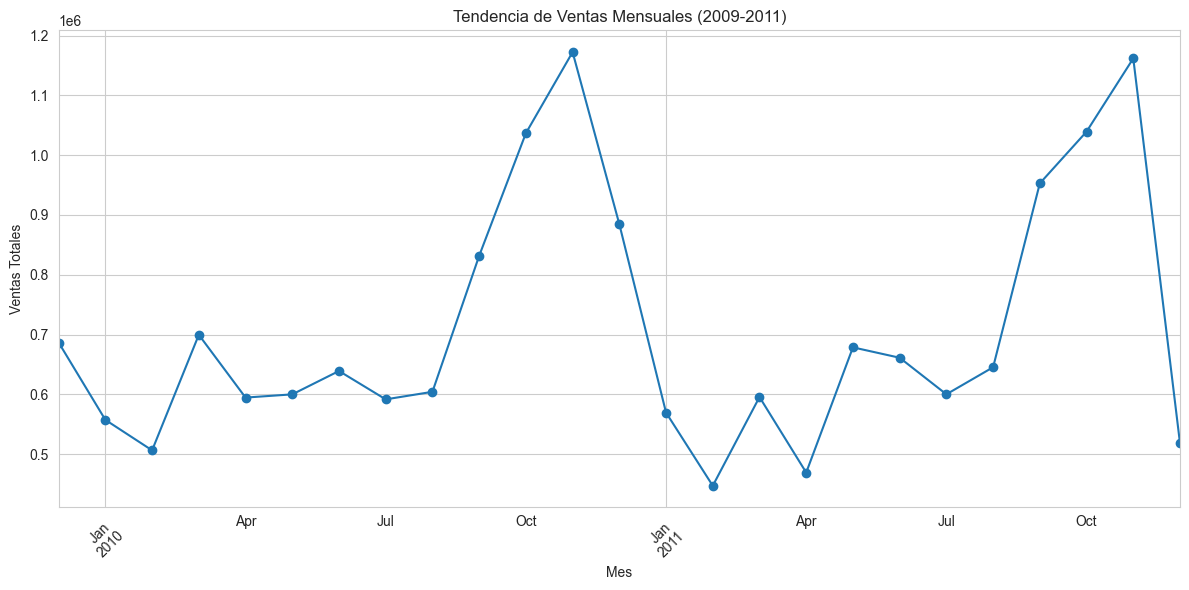

In [7]:
# %%
# Celda 6: Análisis Exploratorio de Datos (EDA) y Visualización
# ============================================================
# Configuramos el estilo de las visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Pregunta 1: ¿Cuál es la tendencia de ventas a lo largo del tiempo?
sales_by_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
sales_by_month.plot(kind='line', marker='o')
plt.title('Tendencia de Ventas Mensuales (2009-2011)')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\30110308\AppData\Local\Temp\ipykernel_8772\2610691359.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=day_order, palette='viridis', ax=ax[0])


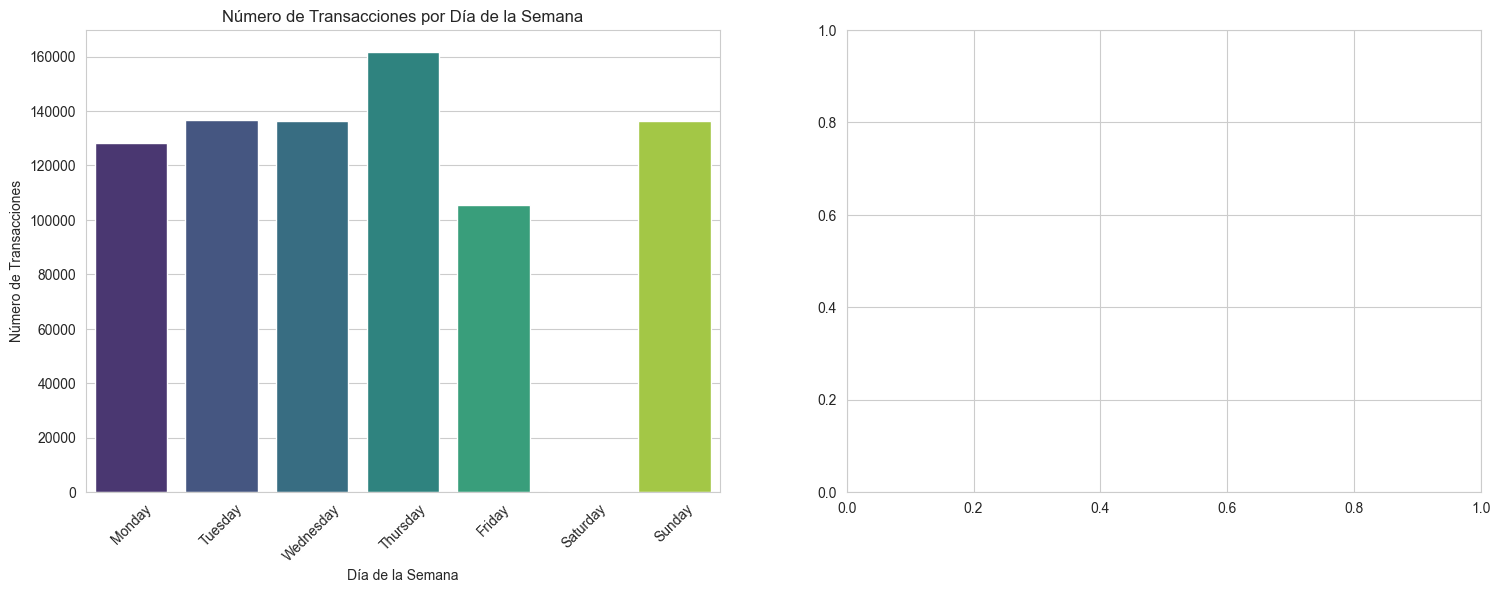

In [8]:
# %%
# Pregunta 2: ¿Qué días de la semana y a qué horas se producen más ventas?
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Ventas por día de la semana
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='DayOfWeek', data=df, order=day_order, palette='viridis', ax=ax[0])
ax[0].set_title('Número de Transacciones por Día de la Semana')
ax[0].set_xlabel('Día de la Semana')
ax[0].set_ylabel('Número de Transacciones')
ax[0].tick_params(axis='x', rotation=45)

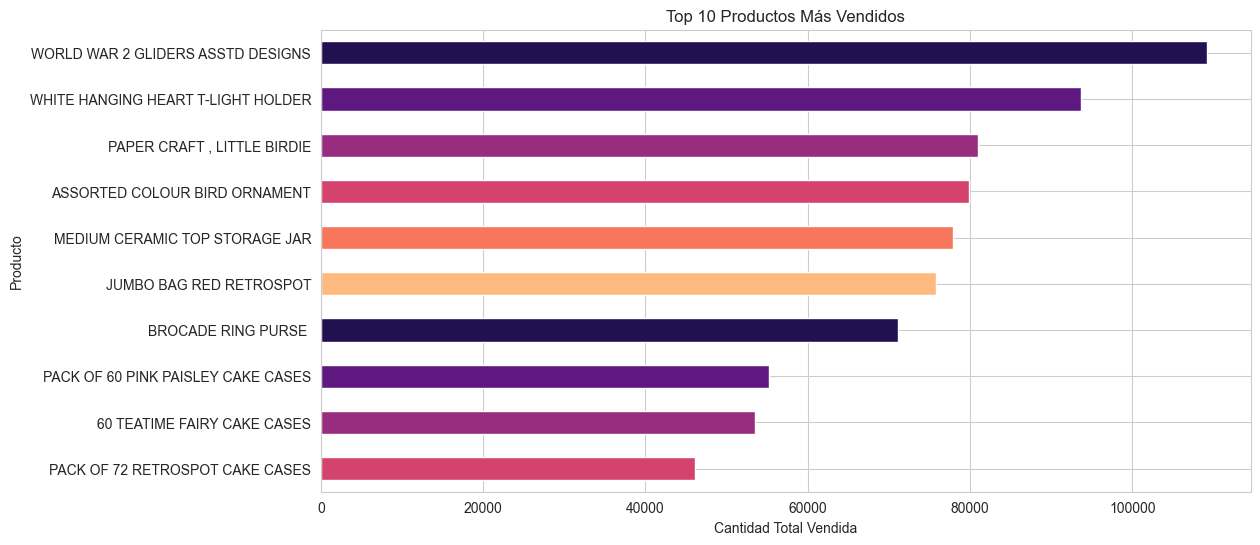

In [9]:
# %%
# Pregunta 3: ¿Cuáles son los 10 productos más vendidos?
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_10_products.plot(kind='barh', color=sns.color_palette("magma"))
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Total Vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.show()

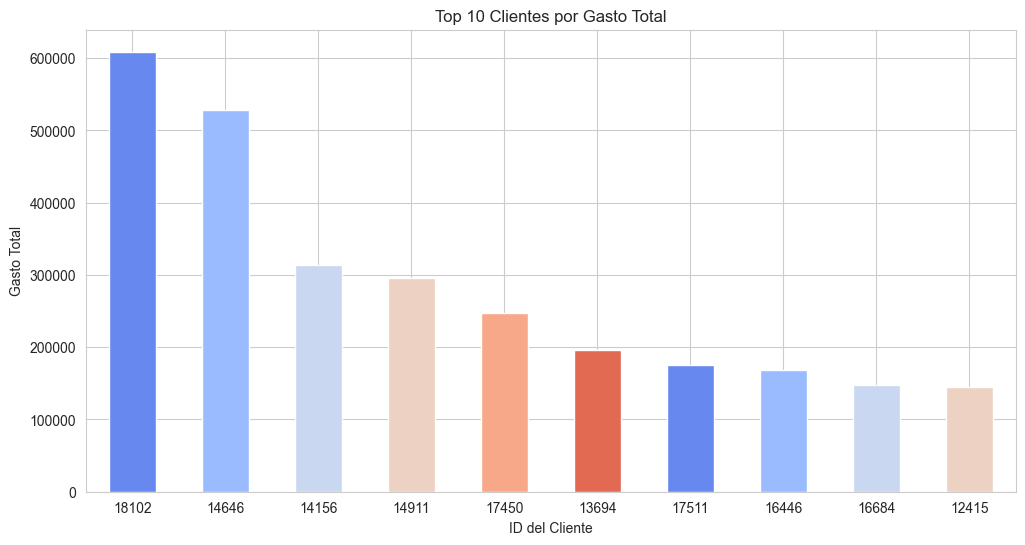

In [10]:
# %%
# Pregunta 4: ¿Quiénes son los 10 clientes más valiosos?
top_10_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_10_customers.plot(kind='bar', color=sns.color_palette("coolwarm"))
plt.title('Top 10 Clientes por Gasto Total')
plt.xlabel('ID del Cliente')
plt.ylabel('Gasto Total')
plt.xticks(rotation=0)
plt.show()

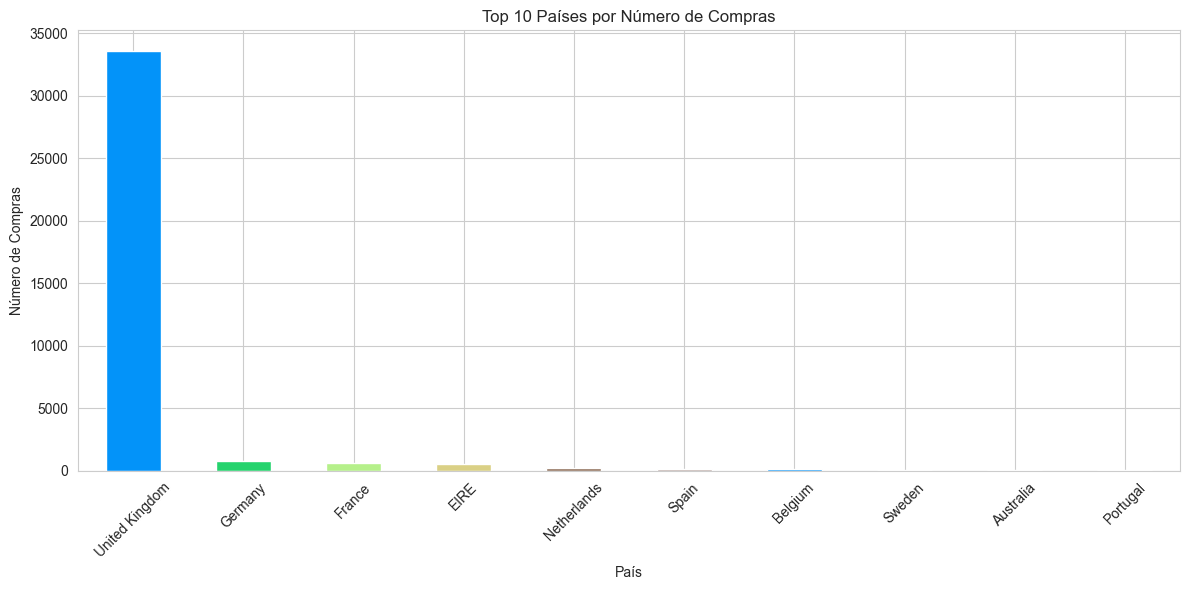

In [11]:
# %%
# Pregunta 5: ¿Desde qué países se realizan más compras?
top_10_countries = df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False).head(10)
top_10_countries.plot(kind='bar', color=sns.color_palette("terrain"))
plt.title('Top 10 Países por Número de Compras')
plt.xlabel('País')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# %%
# Celda 7: Conclusiones Finales
# ============================
print("""
Análisis completado. Algunas conclusiones clave son:
1. Existe una fuerte estacionalidad en las ventas, con un pico en los meses previos a la Navidad.
2. La mayor actividad de compra se concentra en los días laborables, especialmente a mediodía.
3. El catálogo de productos tiene claros "best-sellers" que impulsan la mayoría de las ventas en volumen.
4. Una base de clientes leales (VIP) es responsable de una parte muy significativa de los ingresos totales.
""")


Análisis completado. Algunas conclusiones clave son:
1. Existe una fuerte estacionalidad en las ventas, con un pico en los meses previos a la Navidad.
2. La mayor actividad de compra se concentra en los días laborables, especialmente a mediodía.
3. El catálogo de productos tiene claros "best-sellers" que impulsan la mayoría de las ventas en volumen.
4. Una base de clientes leales (VIP) es responsable de una parte muy significativa de los ingresos totales.

